<h1 align=left><font size = 5>Final Assignment - Part A</font></h1>

## Import the relevant libraries for this code

This section is used to bring in all the relevant libraries and functions needed for this assignment.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/con

## Import and break down the data

Firstly, the data set needs to be brought in.
Note, the path given in the assignment did not work, but the path from one of the exercises did. I manually compared this data, and it is the same.

In [3]:
#concrete_data = pd.read_csv('https://cocl.us/concrete_data.csv')
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')


The data was then broken down into the labels and the targets.

In [4]:
y=concrete_data['Strength']
X=concrete_data.drop(columns='Strength')
n_cols = X.shape[1]

Using the sklearn library, the data was first split into train/test.

In [5]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X_tr, X_t, y_tr, y_t = train_test_split( X, y, test_size=0.3, random_state=4)

Note that the data was already split to have 30% of the data only for validation (hence it is not needed as an attribute in the model itself).

As an option (although not needed at this stage, here is a good way of standardising the data:

In [6]:

#X_tr=preprocessing.StandardScaler().fit(X_tr).transform(X_tr.astype(float))
print('No standadisation was done in this part')


No standadisation was done in this part


## The function for the model

Here, the main parameters of the model is created. This will be called back once training is done.

In [7]:
def baseline_model():
    # define model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


## Training of the model

The model is created. Note, the verbose=2 is useful to see the full line of outputs, but this can be quite crowded.
Consider changing to verbose = 0 to make this thing not go for ages.

In [8]:
model = baseline_model()
A=model.fit(X_tr,y_tr,epochs=50,verbose=2)

Epoch 1/50
 - 1s - loss: 969722.5470
Epoch 2/50
 - 0s - loss: 647656.4732
Epoch 3/50
 - 0s - loss: 408803.6862
Epoch 4/50
 - 0s - loss: 239477.7180
Epoch 5/50
 - 0s - loss: 126380.1319
Epoch 6/50
 - 0s - loss: 59506.5255
Epoch 7/50
 - 0s - loss: 25523.1735
Epoch 8/50
 - 0s - loss: 11532.5344
Epoch 9/50
 - 0s - loss: 6986.3528
Epoch 10/50
 - 0s - loss: 5806.6814
Epoch 11/50
 - 0s - loss: 5392.8077
Epoch 12/50
 - 0s - loss: 5170.5784
Epoch 13/50
 - 0s - loss: 4970.6724
Epoch 14/50
 - 0s - loss: 4780.6214
Epoch 15/50
 - 0s - loss: 4584.4699
Epoch 16/50
 - 0s - loss: 4397.5113
Epoch 17/50
 - 0s - loss: 4219.8926
Epoch 18/50
 - 0s - loss: 4042.9104
Epoch 19/50
 - 0s - loss: 3876.4470
Epoch 20/50
 - 0s - loss: 3711.8029
Epoch 21/50
 - 0s - loss: 3556.1724
Epoch 22/50
 - 0s - loss: 3404.1258
Epoch 23/50
 - 0s - loss: 3260.2974
Epoch 24/50
 - 0s - loss: 3119.4238
Epoch 25/50
 - 0s - loss: 2990.5368
Epoch 26/50
 - 1s - loss: 2864.2724
Epoch 27/50
 - 0s - loss: 2744.5993
Epoch 28/50
 - 0s - loss

Once the model has been fit, it can be analised through its history:

In [9]:
mean_A=np.mean(A.history['loss'])
stdev_A=np.std(A.history['loss'])












For a better understanding of what the history of the training did, here is a plot:

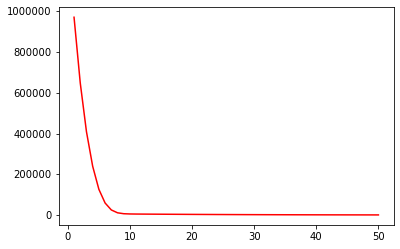

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1,51),A.history['loss'],'r')

## Conclusion

It is clear that the number of epochs has had a massive improvement in the overall error. with the final numbers being:

In [ ]:
print("The mean of the mean squared errors is: : %.2f" % mean_A)
print("The standard deviation of the mean squared errors is: : %.2f" % stdev_A)